In [2]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
mydata <- read.csv('https://raw.githubusercontent.com/gitcnk/Data/master/MedSchoolApplicants.csv',
                    stringsAsFactors = TRUE)


In [4]:
names(mydata)
head(mydata)

[1] "Accept"      "Accept_code" "Sex"         "BCPM"        "GPA"        
 [6] "VR"          "PS"          "WS"          "BS"          "MCAT"       
[11] "Apps"

,Accept,Accept_code,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
,<fct>,<int>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
1,D,0,F,3.59,3.62,11,9,9,9,38,5
2,A,1,M,3.75,3.84,12,13,8,12,45,3
3,A,1,F,3.24,3.23,9,10,5,9,33,19
4,A,1,F,3.74,3.69,12,11,7,10,40,5
5,A,1,F,3.53,3.38,9,11,4,11,35,11
6,A,1,M,3.59,3.72,10,9,7,10,36,5


## This is the HW for Thursday!  

The goal is to build a model to predict the acceptance to medical school based pn servaral predictors.

The Medical College Admissions Test (MCAT) has four sections:
- Verbal Reasoning (VR)
- Physical Sciences (PS)
- Biological Sciences (BS)
- Writing Sample (WS)

Q1: Explore the distribution of GPA values for Accepted and Denied candidates


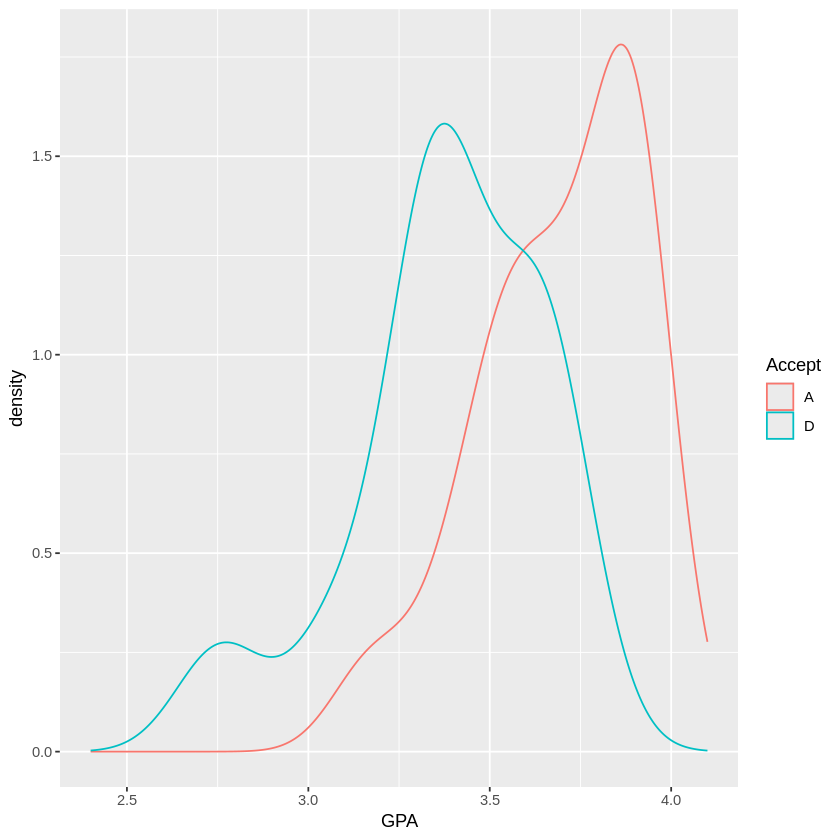

In [7]:
mydata %>%
  ggplot() +
  aes( x = GPA, col = Accept) +
  geom_density() +
  xlim(c(2.4,4.1))

Q2: Explore the distribution of MCAT values for cccepted and denied candidates.





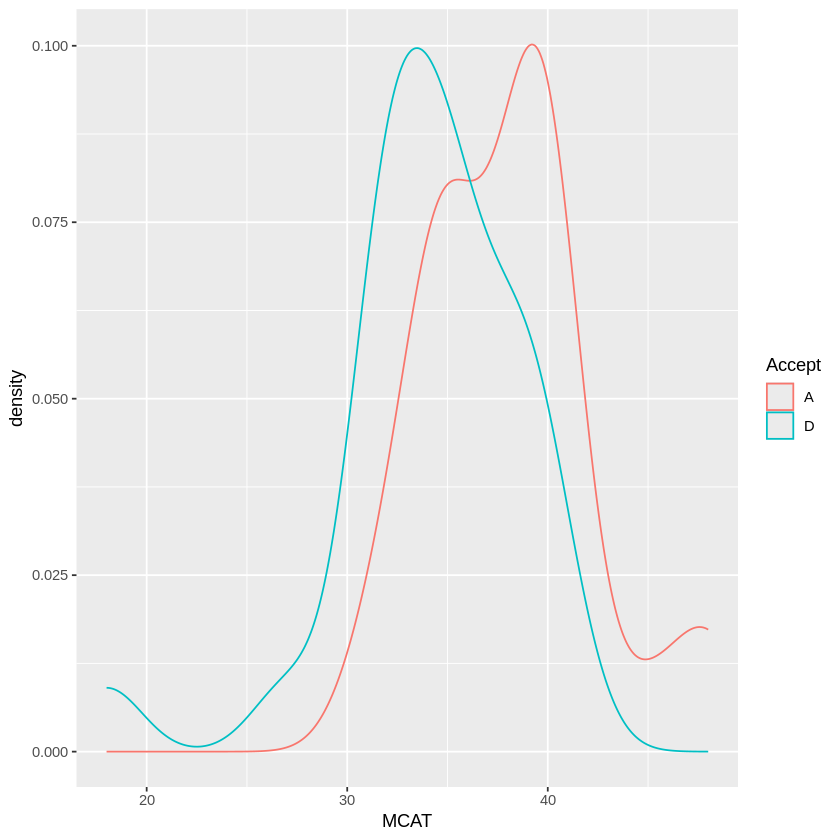

In [9]:
mydata %>%
  ggplot() +
  aes( x = MCAT, col = Accept) +
  geom_density()

Q3: Explore the distribution of number of applications submitted for Accepted and Denied candidates



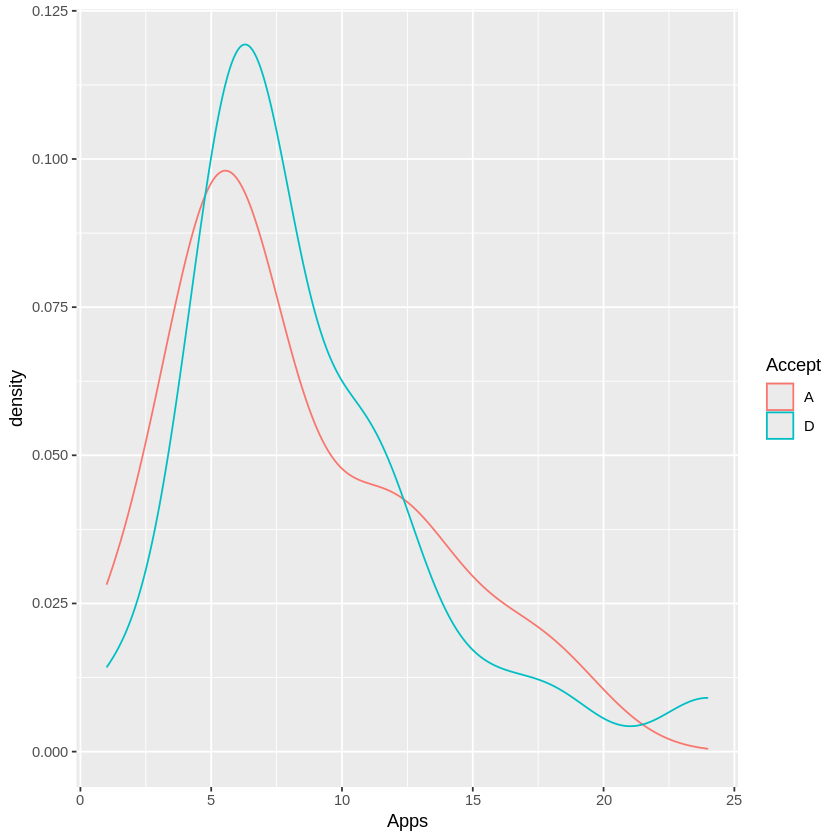

In [10]:
mydata %>%
  ggplot() +
  aes( x = Apps, col = Accept) +
  geom_density()

Q4: Is there a correlation beteween GPA values and MCAT values for Accepted and Denied candidates?  
**Hint:** Use a scatterplot.

Q5: Is this relationship similar(or different) for males and females.  
**Hint:** Use facets.


Question 4

Yes we see a positive result between GPA and MCAT values for accepted and denied candidates. The relationship between denied and GPA is weaker than it appears. It appears to be positive but if you remove an outlier to the far bottom left it would become much flatter.

`geom_smooth()` using formula = 'y ~ x'


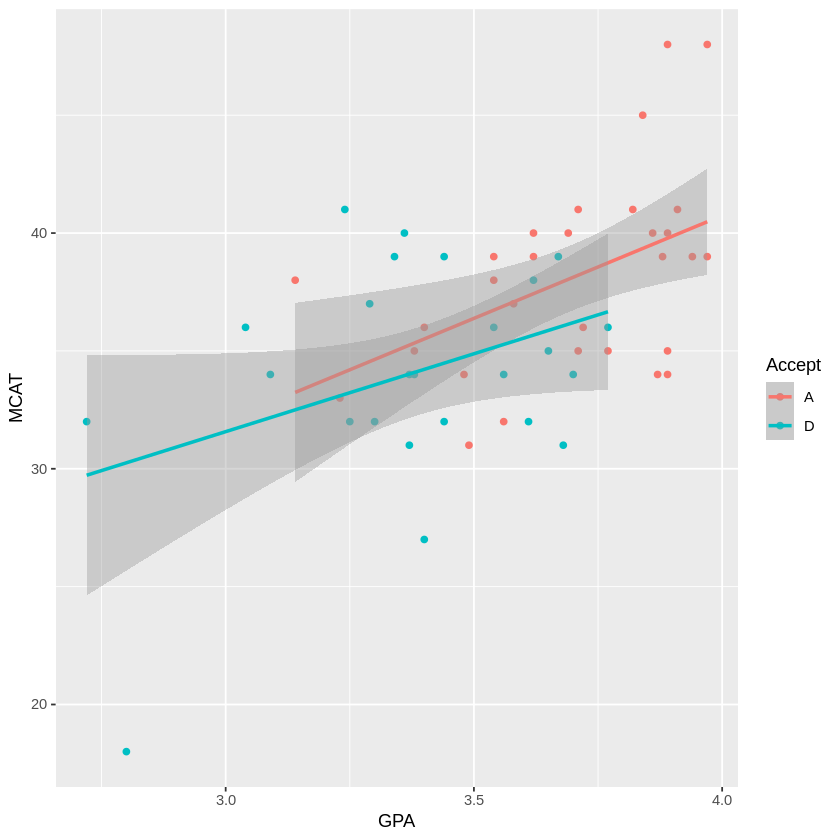

In [17]:
mydata %>%
  ggplot() +
  aes(x = GPA, y = MCAT, col = Accept) +
  geom_point()+
  geom_smooth(method = ("lm"))

Question 5

We see that the relationship between males and females is slightly different. for females, the slope is slightly steeper for accepted students which signals that accepted students tend to have higher mcats than denied students at higher gpa levels

`geom_smooth()` using formula = 'y ~ x'


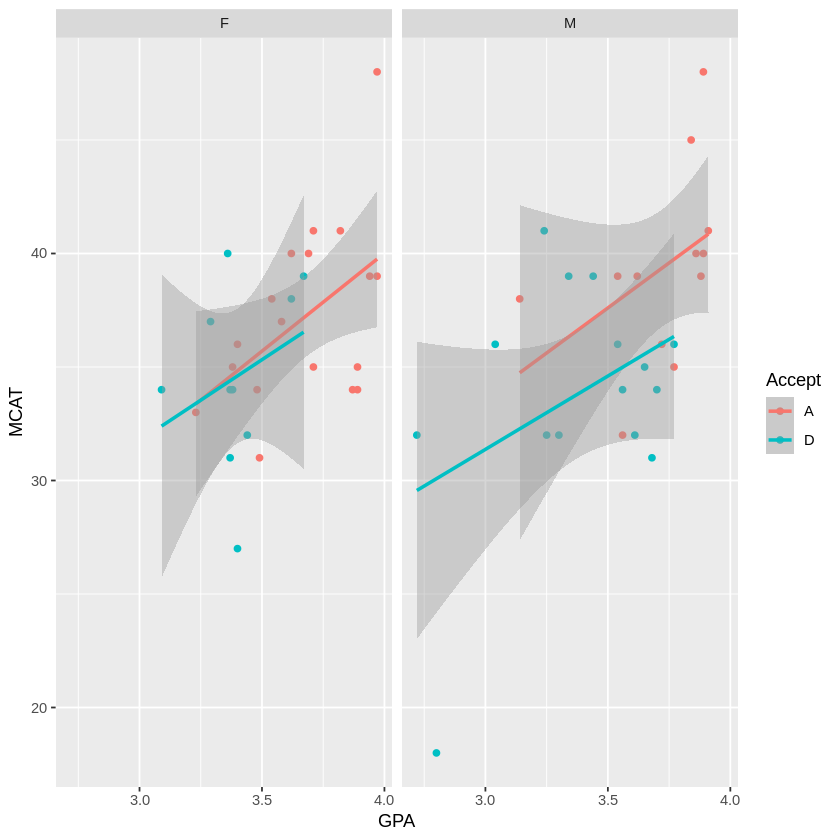

In [16]:
mydata %>%
  ggplot() +
  aes(x = GPA, y = MCAT, col = Accept) +
  geom_point() +
  geom_smooth(method = "lm") + # Add regression lines
  facet_wrap(~Sex) # Facet by gender

Q6: Draw a plot to explore the relationship between GPA and acceptance.  Add the logistic regression curve into the plot.

`geom_smooth()` using formula = 'y ~ x'


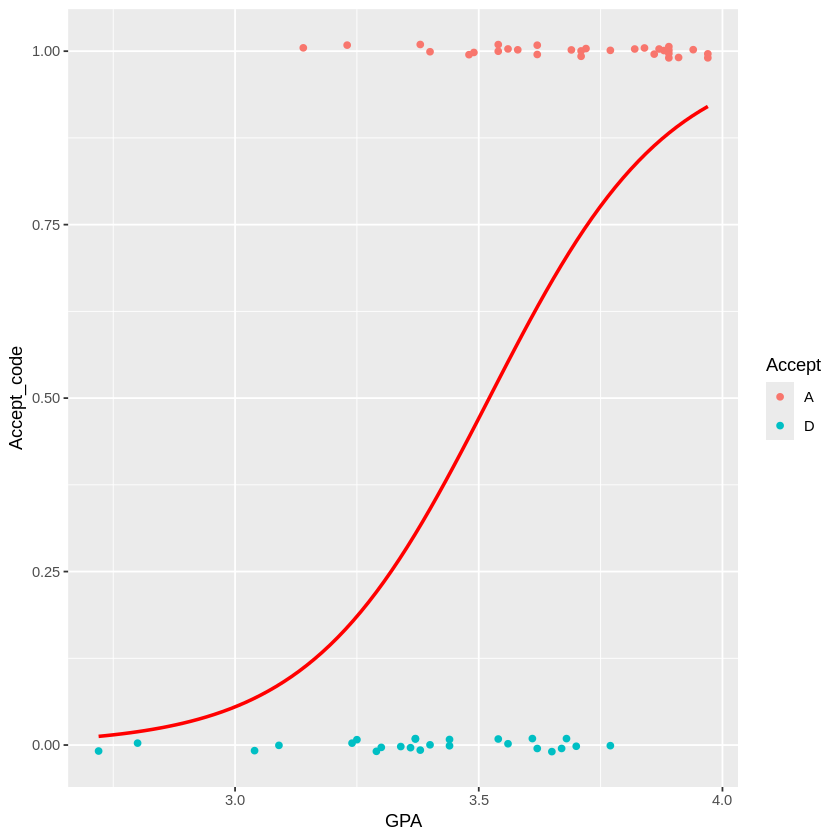

In [6]:
mydata %>%
ggplot() +
  aes(x = GPA, y = Accept_code, col = Accept) +
  geom_jitter(height = 0.01, width = 0) +
  geom_smooth(method = 'glm',
              method.args = list(family = 'binomial'),
              se = FALSE ,
              col = 'red' ,
              fullrange = TRUE)


Q7: Is the probability of acceptance based on GPA is similar(or different) for males and females?

`geom_smooth()` using formula = 'y ~ x'


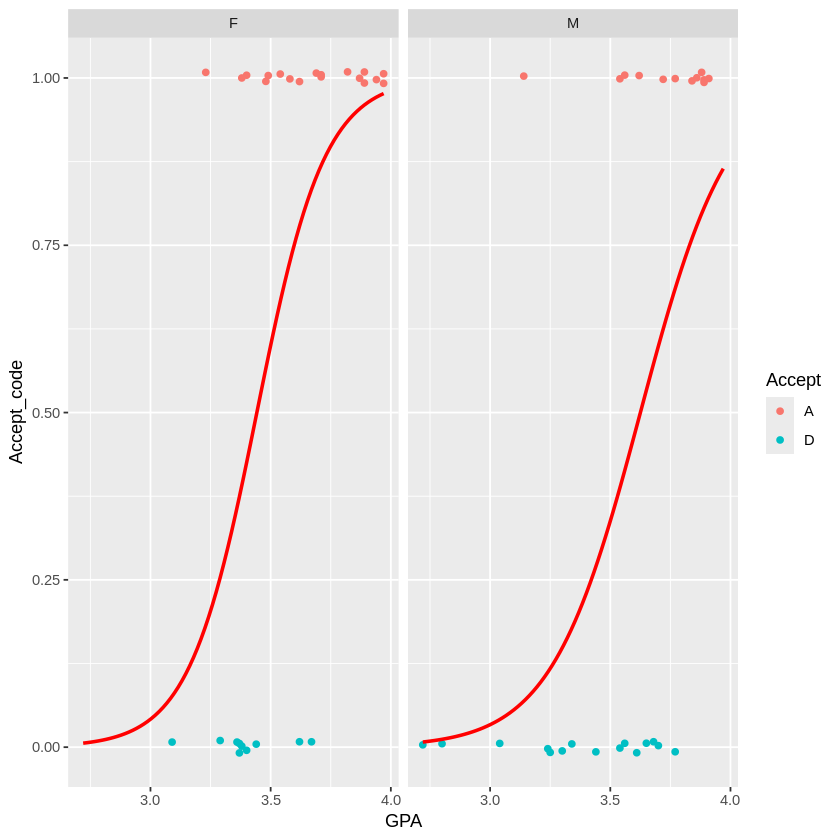

In [18]:
mydata %>%
  ggplot() +
  aes(x = GPA, y = Accept_code, col = Accept) +
  geom_jitter(height = 0.01, width = 0) +
  geom_smooth(method = 'glm',
              method.args = list(family = 'binomial'),
              se = FALSE ,
              col = 'red' ,
              fullrange = TRUE) +
  facet_wrap(~Sex)

Based on the Graph, Females  who have high gpa are more likely to be accepted than makes with high GPA. The curve on the male chart at max gpa is much shorter than the female.

Q8: Use the `glm()` command to fit a logistic model to predict the acceptance probability usinig `GPA` and `Sex` as predictors

In [21]:
glm(Accept_code ~ GPA + Sex + GPA*Sex, data = mydata, family = "binomial")



Call:  glm(formula = Accept_code ~ GPA + Sex + GPA * Sex, family = "binomial", 
    data = mydata)

Coefficients:
(Intercept)          GPA         SexM     GPA:SexM  
    -24.385        7.083        4.901       -1.709  

Degrees of Freedom: 54 Total (i.e. Null);  51 Residual
Null Deviance:	    75.79 
Residual Deviance: 53.73 	AIC: 61.73

Call:  glm(formula = Accept_code ~ GPA + Sex + GPA * Sex, family = "binomial",
    data = mydata)

Coefficients:
(Intercept)          GPA         SexM     GPA:SexM  
    -24.385        7.083        4.901       -1.709  

Degrees of Freedom: 54 Total (i.e. Null);  51 Residual
Null Deviance:	    75.79
Residual Deviance: 53.73 	AIC: 61.73

Q9: Write down equations of the two fitted logistic curves.

In [23]:
model <- glm(Accept_code ~ GPA + Sex + Sex*GPA, data = mydata, family = "binomial")

coefs <- coef(model)

eq_female <- paste0("logit(P(Accept)) = ", coefs[1], " + ", coefs[2], "*GPA")

eq_male <- paste0("logit(P(Accept)) = ", coefs[1], " + ", coefs[2], "*GPA + ", coefs[3])


cat("Equation for Females:\n", eq_female, "\n\n")
cat("Equation for Males:\n", eq_male, "\n")


Equation for Females:
 logit(P(Accept)) = -24.3852273882497 + 7.08339734973601*GPA 

Equation for Males:
 logit(P(Accept)) = -24.3852273882497 + 7.08339734973601*GPA + 4.90101807062324 


Equation for Females:
 logit(P(Accept)) = -24.3852273882497 + 7.08339734973601*GPA

Equation for Males:
 logit(P(Accept)) = -24.3852273882497 + 7.08339734973601*GPA + 4.90101807062324

Q10: What is the $R^2$ of your model?  Do you see one in your model output?

We don't have an R^2 for the glm mode. There is no univerally agreed upon R^2 equivalent for logistics becayse they dont directly measure variance in the same way as a linear regression. There are pseudo r^2 but none are outputted by glm.